In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


In [7]:
# Create DataFrame with feature names
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y


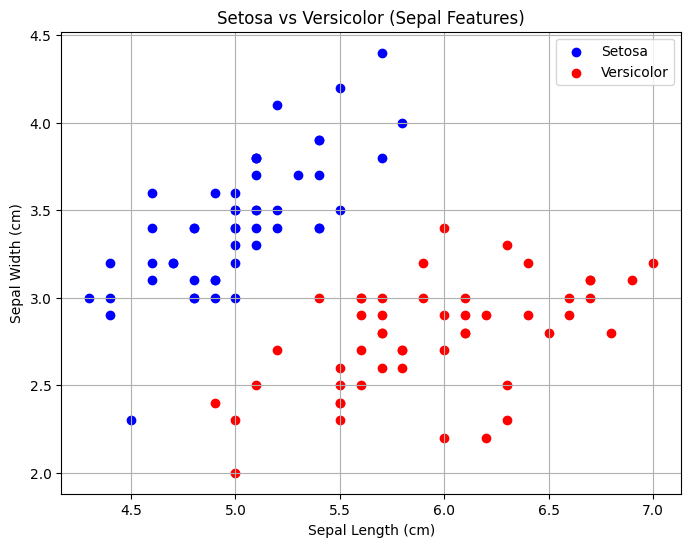

In [8]:
import matplotlib.pyplot as plt

# Keep only Setosa (0) and Versicolor (1)
binary_df = df[df['target'] != 2].copy()

# Scatter plot for Sepal Length vs Sepal Width
plt.figure(figsize=(8, 6))
plt.scatter(binary_df[binary_df['target'] == 0]['sepal length (cm)'],
            binary_df[binary_df['target'] == 0]['sepal width (cm)'],
            label='Setosa', color='blue')
plt.scatter(binary_df[binary_df['target'] == 1]['sepal length (cm)'],
            binary_df[binary_df['target'] == 1]['sepal width (cm)'],
            label='Versicolor', color='red')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Setosa vs Versicolor (Sepal Features)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Features and target
X_binary = binary_df.drop('target', axis=1).values
y_binary = binary_df['target'].values


In [10]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test split
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import Perceptron

# Initialize and train the Perceptron
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate metrics
print("Built-in Perceptron Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")


Built-in Perceptron Metrics:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000


In [13]:
class CustomPerceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convert labels to -1 and 1
        y_ = np.where(y == 1, 1, -1)

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)
                if y_predicted != y_[idx]:
                    self.weights += self.lr * y_[idx] * x_i
                    self.bias += self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(np.sign(linear_output) == 1, 1, 0)


In [14]:
# Train custom model
custom_model = CustomPerceptron(learning_rate=0.01, n_iterations=1000)
custom_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_custom = custom_model.predict(X_test)

print("\nCustom Perceptron Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_custom):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_custom):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_custom):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_custom):.4f}")



Custom Perceptron Metrics:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000


## Conclusion

- Both models performed well on the binary classification task since **Setosa and Versicolor are linearly separable**.

- The **built-in Perceptron** from `scikit-learn` is more **optimized**, easy to use, and likely performs slightly better or faster.

- The **custom Perceptron** is great for understanding how weight updates and classification work, though it may lack optimization and additional features.

- **Evaluation metrics** such as **Accuracy**, **Precision**, **Recall**, and **F1 Score** were high for both models, confirming their effectiveness on this simplified task.

